In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout



In [27]:
year_2021 = pd.read_csv('Data_PY/DATA_2021.csv')
year_training = year_2021[:282]

year_test = year_2021[283:]


In [38]:
#Device train, test
Nhiet_do_training = year_training.copy().drop(['YYYY','MM','DD','TIME','DOMAN','PH','NH3','H2S','TSS','DO','COD'], axis = 1)
Nhiet_do_test = year_test.copy().drop(['YYYY','MM','DD','TIME','DOMAN','PH','NH3','H2S','TSS','DO','COD'], axis = 1)


94

In [37]:
Nhiet_do_training

,TEMP
0,32.0
1,33.0
2,32.0
3,31.0
4,33.0
...,...
277,30.0
278,30.0
279,29.5
280,32.0


### MinMaxScaler

In [7]:
# #scaler train, test
# scaler = MinMaxScaler()
# Nhiet_do_training = scaler.fit_transform(Nhiet_do_training)
# Nhiet_do_test = scaler.fit_transform(Nhiet_do_test)


### Standas Scaler

In [39]:
#Standas Scaler
scaler = StandardScaler()
Nhiet_do_training = scaler.fit_transform(Nhiet_do_training)
Nhiet_do_test = scaler.fit_transform(Nhiet_do_test)



In [40]:
Nhiet_do_training

array([[ 0.94274607],
       [ 1.56462768],
       [ 0.94274607],
       [ 0.32086445],
       [ 1.56462768],
       [ 1.25368688],
       [ 0.94274607],
       [-0.92289878],
       [ 0.94274607],
       [ 1.56462768],
       [ 0.94274607],
       [ 0.63180526],
       [ 0.94274607],
       [ 1.56462768],
       [ 1.25368688],
       [ 0.94274607],
       [ 0.94274607],
       [-0.92289878],
       [-0.92289878],
       [ 1.56462768],
       [ 1.56462768],
       [ 1.56462768],
       [-0.92289878],
       [ 1.56462768],
       [ 0.94274607],
       [-0.92289878],
       [-0.92289878],
       [ 0.94274607],
       [ 0.32086445],
       [-0.30101717],
       [ 0.94274607],
       [-6.51983333],
       [-0.92289878],
       [ 0.94274607],
       [-0.92289878],
       [-1.5447804 ],
       [ 0.32086445],
       [-0.30101717],
       [ 0.32086445],
       [ 0.32086445],
       [-0.30101717],
       [-0.30101717],
       [ 0.32086445],
       [ 0.94274607],
       [-0.30101717],
       [-1

In [41]:
#Dùng 60 i put để dự đoán 1 output
def get_X_y(data_train):
    Nhiet_do_X = []
    Nhiet_do_y = []

    for i in range(60, data_train.shape[0]):
        Nhiet_do_X.append(data_train[i-60:i,0])
        Nhiet_do_y.append(data_train[i,0])

    Nhiet_do_X = np.array(Nhiet_do_X)
    Nhiet_do_y = np.array(Nhiet_do_y)

    return Nhiet_do_X, Nhiet_do_y

In [42]:
Nhiet_do_X_train, Nhiet_do_y_train = get_X_y(Nhiet_do_training)

In [43]:
Nhiet_do_X_train

array([[ 0.94274607,  1.56462768,  0.94274607, ...,  2.1865093 ,
         0.32086445,  0.32086445],
       [ 1.56462768,  0.94274607,  0.32086445, ...,  0.32086445,
         0.32086445,  0.32086445],
       [ 0.94274607,  0.32086445,  1.56462768, ...,  0.32086445,
         0.32086445,  0.32086445],
       ...,
       [ 0.94274607, -0.92289878, -2.16666201, ..., -0.30101717,
        -0.30101717, -0.30101717],
       [-0.92289878, -2.16666201, -0.92289878, ..., -0.30101717,
        -0.30101717, -0.61195797],
       [-2.16666201, -0.92289878, -0.92289878, ..., -0.30101717,
        -0.61195797,  0.94274607]])

In [44]:
Nhiet_do_X_test, Nhiet_do_y_test = get_X_y(Nhiet_do_test)

In [47]:
Nhiet_do_X_test

array([[ 1.68334202,  1.68334202, -1.22770057, ...,         nan,
        -1.22770057, -1.22770057],
       [ 1.68334202, -1.22770057, -1.22770057, ..., -1.22770057,
        -1.22770057, -0.93659631],
       [-1.22770057, -1.22770057,  0.51892498, ..., -1.22770057,
        -0.93659631, -1.22770057],
       ...,
       [ 1.1011335 ,  0.81002924,  0.51892498, ..., -1.22770057,
        -1.22770057, -0.93659631],
       [ 0.81002924,  0.51892498,  1.39223776, ..., -1.22770057,
        -0.93659631, -1.22770057],
       [ 0.51892498,  1.39223776,  1.1011335 , ..., -0.93659631,
        -1.22770057, -1.22770057]])

In [13]:
# #cấu hình lại đầu vào
# #cấu hình lại x
# Nhiet_do_X_train = np.reshape(Nhiet_do_X_train, (Nhiet_do_X_train.shape[0],Nhiet_do_X_train.shape[1], 1))
# Nhiet_do_X_train.shape

(222, 60, 1)

In [48]:
#xây dựng mô hình LSTM đầu tiên
#activation: hàm kích hoạt
LSTM_model = Sequential()
LSTM_model.add(LSTM(units = 60, activation = 'relu', return_sequences= True, input_shape = (Nhiet_do_X_train.shape[1], 1)))
LSTM_model.add(Dropout(0.1))

In [49]:
#xây dựng các lớp LSTM tiếp theo
LSTM_model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
LSTM_model.add(Dropout(0.1))

LSTM_model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
LSTM_model.add(Dropout(0.1))

LSTM_model.add(LSTM(units = 120, activation = 'relu'))
LSTM_model.add(Dropout(0.1))

In [50]:
#xây dựng lớp đầu ra
LSTM_model.add(Dense(units = 1))

In [51]:
LSTM_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 60)            14880     
                                                                 
 dropout_4 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_5 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_6 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [52]:
#Đào tạo lại mô hình(Compile model)
LSTM_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [53]:

LSTM_model.fit(Nhiet_do_X_train, Nhiet_do_y_train, epochs = 50, batch_size = 32)

Epoch 1/50
7/7 [==============================] - 8s 141ms/step - loss: 0.7764
Epoch 2/50
7/7 [==============================] - 1s 139ms/step - loss: 0.7714
Epoch 3/50
7/7 [==============================] - 1s 126ms/step - loss: 0.7668
Epoch 4/50
7/7 [==============================] - 1s 135ms/step - loss: 0.7664
Epoch 5/50
7/7 [==============================] - 1s 122ms/step - loss: 0.7652
Epoch 6/50
7/7 [==============================] - 1s 123ms/step - loss: 0.7641
Epoch 7/50
7/7 [==============================] - 1s 123ms/step - loss: 0.7614
Epoch 8/50
7/7 [==============================] - 1s 127ms/step - loss: 0.7595
Epoch 9/50
7/7 [==============================] - 1s 126ms/step - loss: 0.7568
Epoch 10/50
7/7 [==============================] - 1s 128ms/step - loss: 0.7593
Epoch 11/50
7/7 [==============================] - 1s 128ms/step - loss: 0.7545
Epoch 12/50
7/7 [==============================] - 1s 122ms/step - loss: 0.7415
Epoch 13/50
7/7 [==============================] 

In [54]:
#save model
LSTM_model.save('LSTM_model_2021_demo.h5')

In [55]:
#đào tạo mô hình
Nhiet_do_y_pred_LSTM_model = LSTM_model.predict(Nhiet_do_X_test)
Nhiet_do_y_pred_LSTM_model#do X_test dc scaler nên _test thuộc [0,1]


2/2 [==============================] - 1s 24ms/step


array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

In [56]:
Nhiet_do_y_pred_LSTM_model = scaler.inverse_transform(Nhiet_do_y_pred_LSTM_model)
Nhiet_do_y_pred_LSTM_model

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

In [60]:
Nhiet_do_y_test.shape = (Nhiet_do_y_test.size, 1)
Nhiet_do_y_test = scaler.inverse_transform(Nhiet_do_y_test)
Nhiet_do_y_test

array([[25.5],
       [25. ],
       [25. ],
       [26. ],
       [25. ],
       [25.5],
       [25.5],
       [25. ],
       [25. ],
       [25. ],
       [29.5],
       [29. ],
       [29. ],
       [29.5],
       [29. ],
       [29. ],
       [28. ],
       [28. ],
       [28. ],
       [28.5],
       [28. ],
       [28. ],
       [25. ],
       [25. ],
       [25.5],
       [24.5],
       [25. ],
       [25. ],
       [25. ],
       [25. ],
       [25.5],
       [25. ],
       [25. ],
       [25. ]])

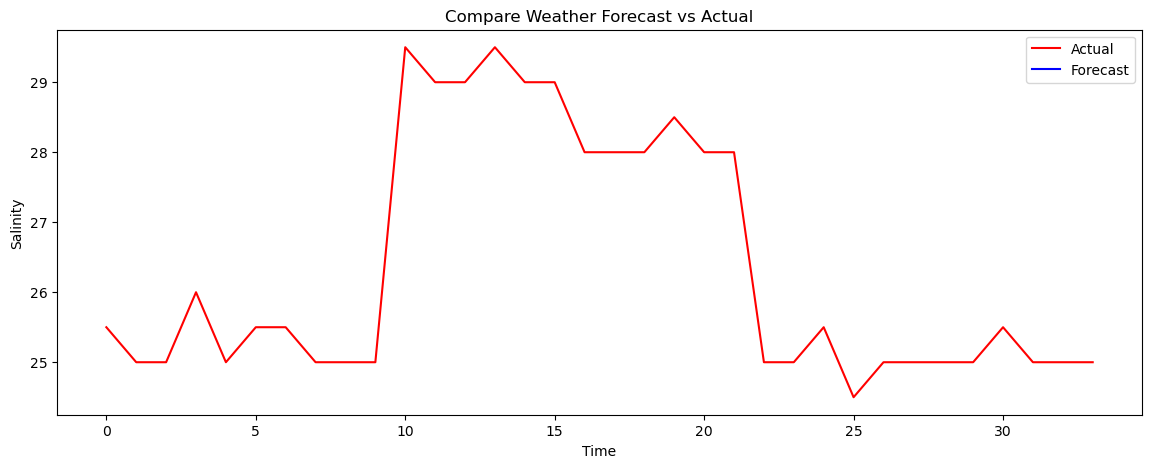

In [61]:
plt.figure(figsize=(14,5))
plt.plot(Nhiet_do_y_test, color = 'red', label = 'Actual')
plt.plot(Nhiet_do_y_pred_LSTM_model, color = 'blue', label = 'Forecast')
plt.title('Compare Weather Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Salinity')
plt.legend()
plt.show()
